In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfea

def geography(left, right, bottom, top):
    #
    resolution = 12
    #
    upperindex = int((90-top)*resolution)
    lowerindex = int((90-bottom)*resolution)
    leftindex = int((180+left)*resolution)
    rightindex = int((180+right)*resolution)
    #
    rgnshape = (lowerindex-upperindex, rightindex-leftindex)
    #
    img_extent = (left, right, bottom, top)
    
    return upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent
    
def city_mask(city_index):
    root_dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city'
    city_path = f'{root_dir}/dat/cty_msk_/gpw4/city_{city_index:08}.gl5'
    city_mask = np.fromfile(city_path, 'float32').reshape(2160, 4320)
    return city_mask

def city_summary_mask():
    root_dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city'
    smry_path = f'{root_dir}/dat/cty_msk_/gpw4/city_clrd0000.gl5'
    smry_mask = np.fromfile(smry_path, 'float32').reshape(2160, 4320)
    return smry_mask
    
def downtown_mask(city_index):
    root_dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city'
    dwn_path = f'{root_dir}/dat/vld_cty_/city_{city_index:08}.gl5'
    dwn_mask = np.fromfile(dwn_path, 'float32').reshape(2160, 4320)
    return dwn_mask

def downtown_summary_mask():
    root_dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city'
    smry_path = f'{root_dir}/dat/vld_cty_/city_00000000.gl5'
    smry_mask = np.fromfile(smry_path, 'float32').reshape(2160, 4320)
    return smry_mask
    
def population():
    root_dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city'
    pop_path = f'{root_dir}/dat/pop_tot_/GPW4ag__20100000.gl5'
    pop_tot_ = np.fromfile(pop_path, 'float32').reshape(2160, 4320)
    return pop_tot_
    
def crop(dat, left, right, bottom, top):
    upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(left, right, bottom, top)
    dat_cropped = dat[upperindex:lowerindex, leftindex:rightindex]
    dat_masked = np.ma.masked_where(dat_cropped == 0, dat_cropped)
    return dat_masked
    
def draw(extent, image, cmap='jet_r'):
    fig = plt.figure()
    projection = ccrs.PlateCarree()
    ax = plt.subplot(projection=projection)
    ax.set_extent(extent, projection)
    gl = ax.gridlines(draw_labels=True, zorder=0)
    gl.right_labels = False 
    gl.bottom_labels = False
    ax.add_feature(cfea.OCEAN, color='#BBBBBB')
    ax.add_feature(cfea.LAKES, color='#BBBBBB')
    ax.coastlines(zorder=1)
    
    img = ax.imshow(image,
                origin='upper',
                extent=extent,
                transform=projection,
                cmap=cmap,
    ) 
    plt.show()
    #fig.colorbar(img, ax=ax, orientation='vertical', shrink=1, pad=0.08)

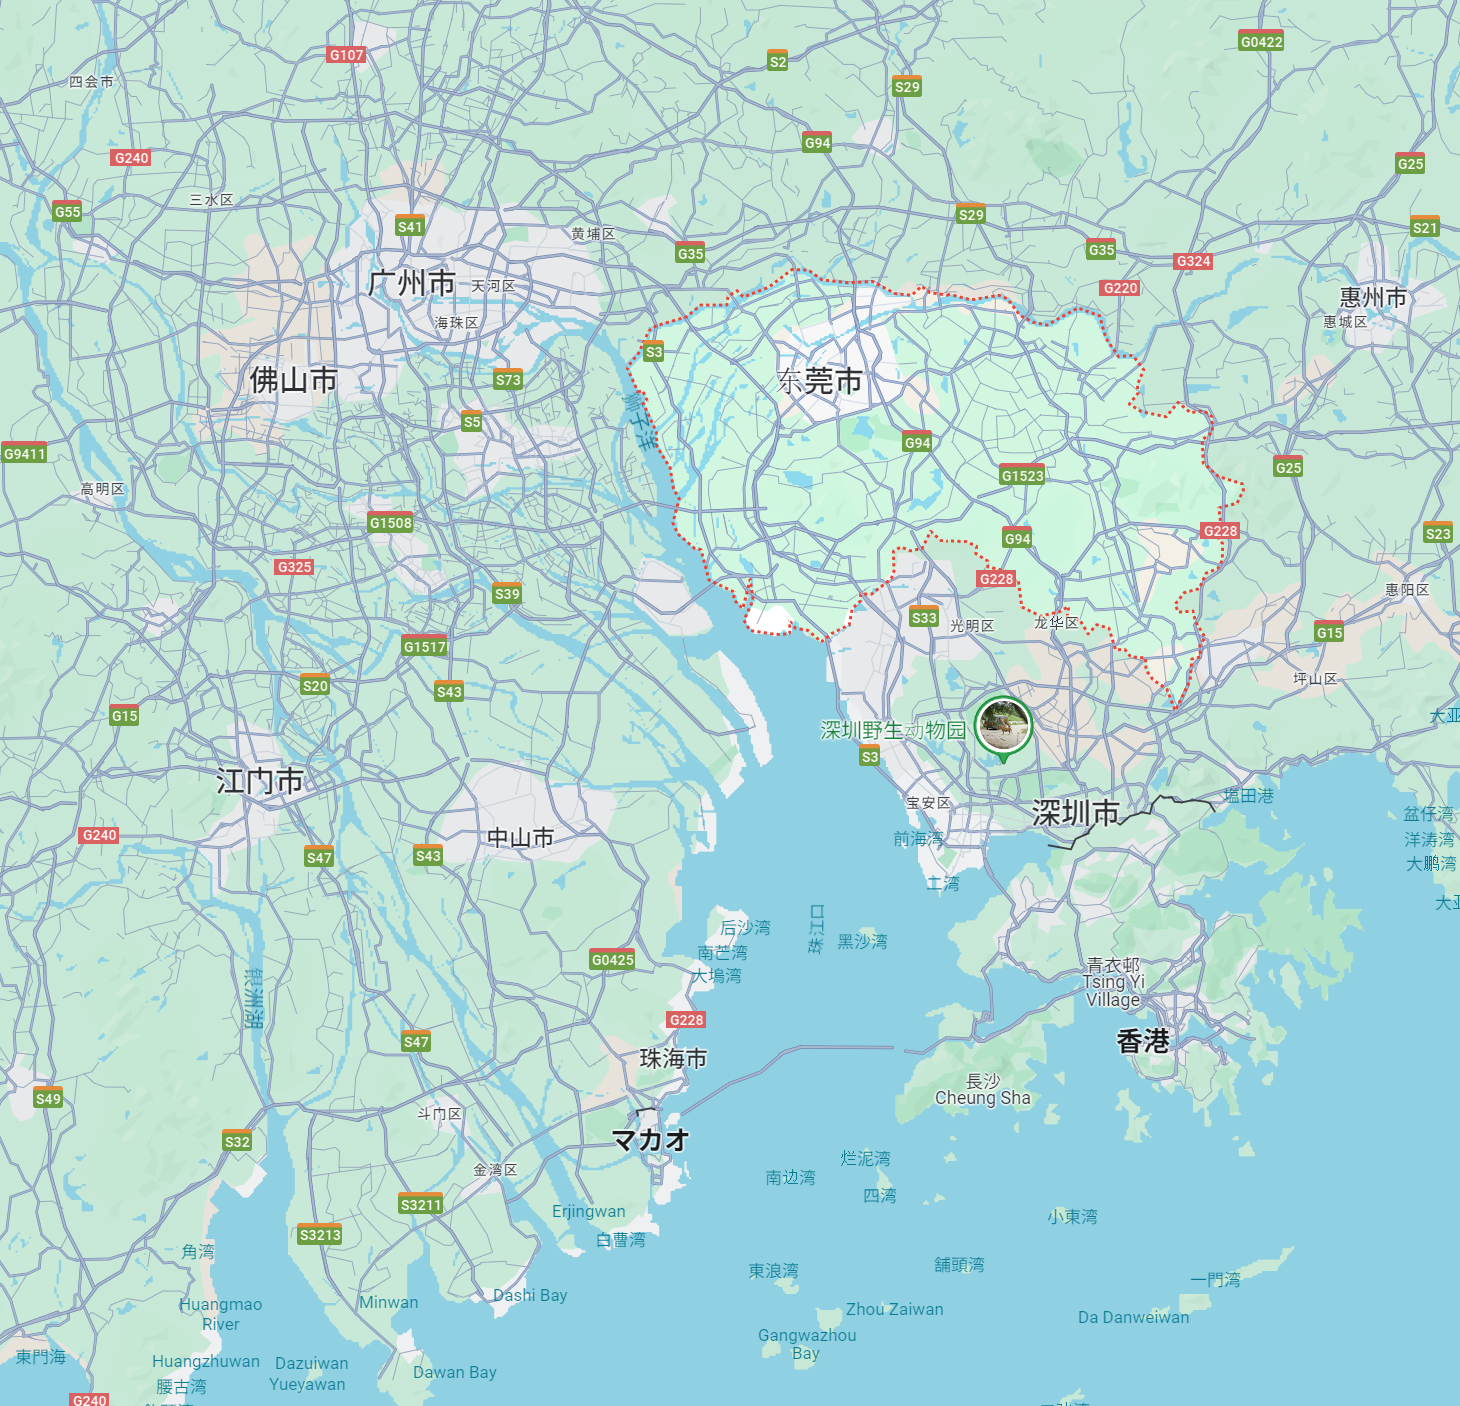

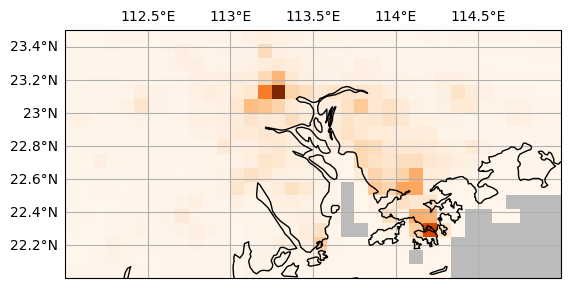

In [21]:
left, right, bottom, top = 112.0, 115.0, 22.0, 23.5
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(left, right, bottom, top)
pop = population()
pop_masked = crop(pop, left, right, bottom, top)
draw(img_extent, pop_masked, cmap='Oranges')

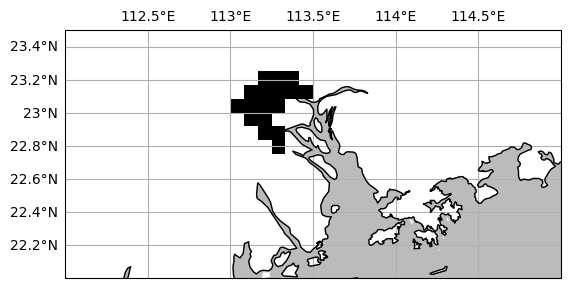

10685703.0


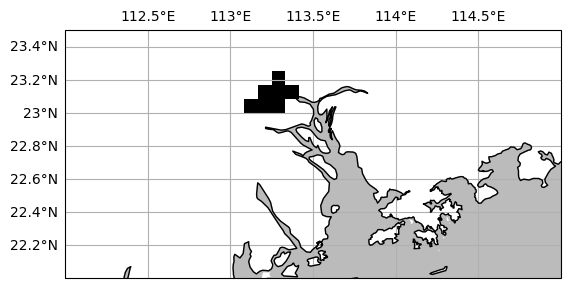

7503985.5


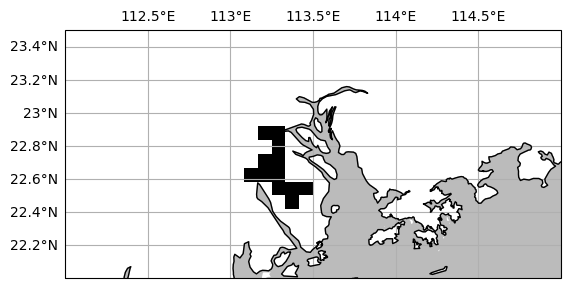

3151221.2


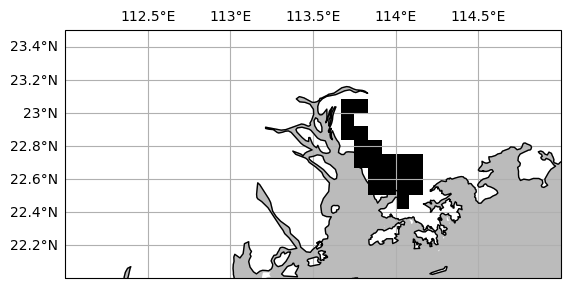

11271207.0


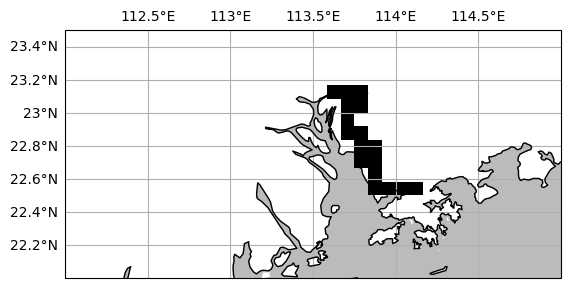

8812633.0


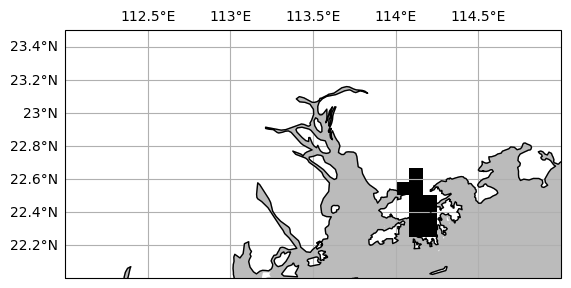

8048314.5


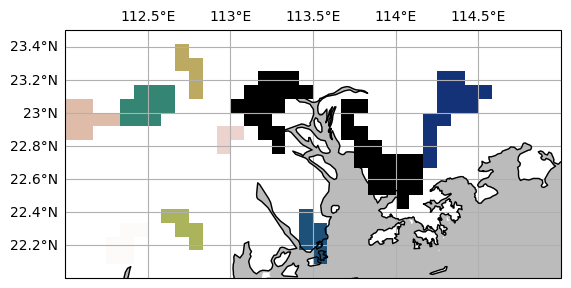

[masked_array(data=[23.0, 24.0, 231.0, 331.0, 594.0, 1211.0, 1358.0,
                   1612.0, 1693.0, 1800.0, --],
             mask=[False, False, False, False, False, False, False, False,
                   False, False,  True],
       fill_value=1e+20,
            dtype=float32)]
28853652.0


In [27]:
# 23: Guangzhou, Guangdong, 10,278,197
# 24: Shenzhen, 10,222,916
# 42: Dongguan, 7,118,410
# 43: Hong Kong, 7,025,221
# 44 Foshan, 6,653,177
# 148: Zhongshan, 2,681,815

tm_lst = [23, 44, 148, 24, 42, 43]
for index in tm_lst:
    city = city_mask(index)
    city_masked = crop(city, left, right, bottom, top)
    draw(img_extent, city_masked, cmap='gray')
    pop_sum = np.sum(pop_masked[city_masked > 0])
    print(pop_sum)

cty_smry = city_summary_mask()
cty_smry_masked = crop(cty_smry, left, right, bottom, top)
draw(img_extent, cty_smry_masked, cmap='gist_earth')
cty_num = [np.unique(cty_smry_masked)]
print(cty_num)
print(np.sum(pop_masked[cty_smry_masked>0]))

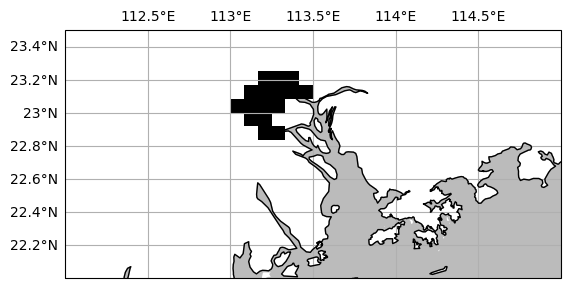

-------------------------
index: 23
10401389.0
-------------------------


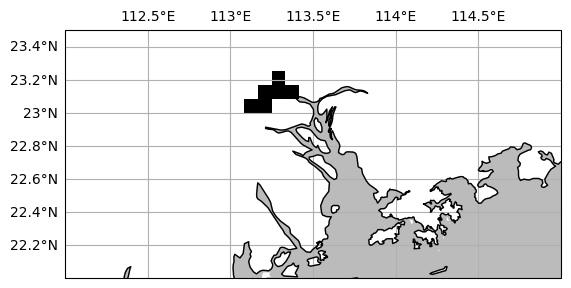

-------------------------
index: 44
6943091.0
-------------------------


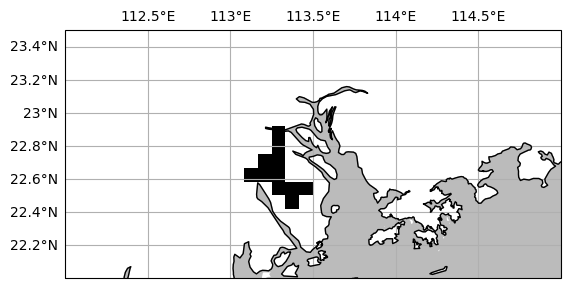

-------------------------
index: 148
2865463.8
-------------------------


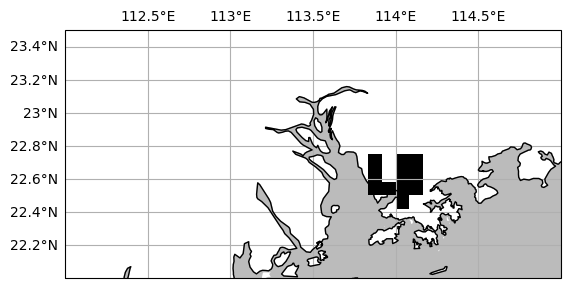

-------------------------
index: 24
7063726.5
-------------------------


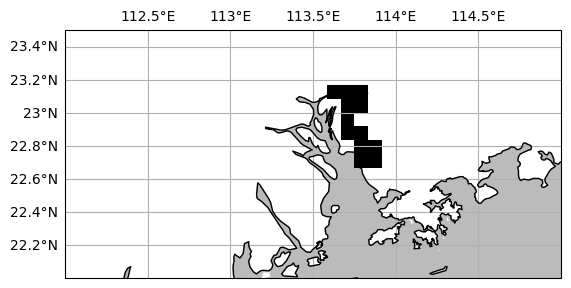

-------------------------
index: 42
4928383.5
-------------------------


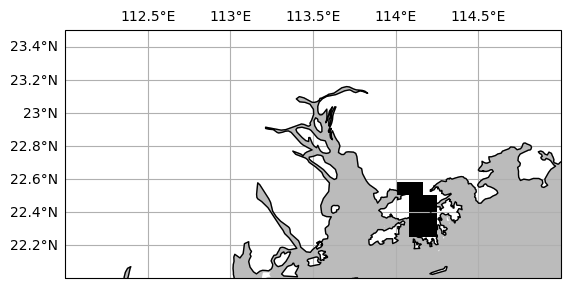

-------------------------
index: 43
7093425.0
-------------------------


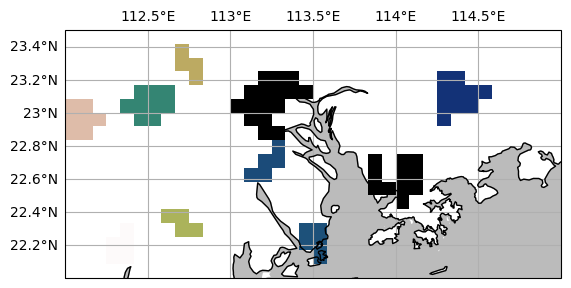

[masked_array(data=[23.0, 24.0, 231.0, 310.0, 331.0, 594.0, 1211.0, 1358.0,
                   1612.0, 1800.0, --],
             mask=[False, False, False, False, False, False, False, False,
                   False, False,  True],
       fill_value=1e+20,
            dtype=float32)]
24167420.0


In [26]:
tm_lst = [23, 44, 148, 24, 42, 43]
for index in tm_lst:
    dwn = downtown_mask(index)
    dwn_masked = crop(dwn, left, right, bottom, top)
    draw(img_extent, dwn_masked, cmap='gray')
    pop_sum = np.sum(pop_masked[dwn_masked > 0])
    print('-------------------------')
    print(f'index: {index}')
    print(pop_sum)
    print('-------------------------')

smry = downtown_summary_mask()
dwn_smry_masked = crop(smry, left, right, bottom, top)
draw(img_extent, dwn_smry_masked, cmap='gist_earth')
cty_num = [np.unique(dwn_smry_masked)]
print(cty_num)
print(np.sum(pop_masked[dwn_smry_masked>0]))

In [ ]:

smry = downtown_summary_mask()
smry_masked = crop(smry, -120.0, -116.5, 32.25, 35.75)
draw(img_extent, smry_masked, cmap='gist_earth')
cty_num = [np.unique(smry_masked)]
print(cty_num)
print(np.sum(pop_masked[smry_masked>0]))